# Create a Psychedelia Bitmap from a Raw Image

Download the image

In [7]:
! curl "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.RKylSefub8hDqPoO2ixk9AAAAA%26pid%3DApi&f=1&ipt=ae1ac472803b78521f4135f5e1c0780e532a0c70effa14ab075a3b9fa20e113a&ipo=images" -o sheepl.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18168    0 18168    0     0   201k      0 --:--:-- --:--:-- --:--:--  201k


Load it and resize it

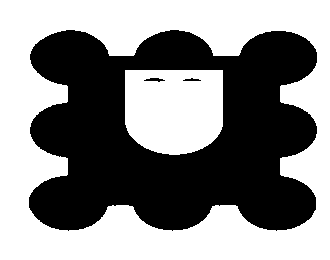

In [8]:
import numpy as np
from PIL import Image, ImageChops
thresh = 200
fn = lambda x : 255 if x > thresh else 0
pname = "sheepl"

img = Image.open(f'{pname}.png')
img = img.crop((20,0,350,260)).convert('L').point(fn, mode='1')
img = ImageChops.invert(img)
img

Convert the image to a bitmap of 0s and 1s

In [29]:
img_data = list(img.getdata())
img_array = []
for i in range(0,len(img_data), img.width):
    img_array += [(0 if p == 255 else 1) for p in img_data[i:i+img.width]]
    #print(''.join([str((0 if p == 255 else 1)) for p in img_data[i:i+img.width]]))

Filter the bitmap to just the pixels that plot the edge of the image

In [30]:
import math

pixel_indices = []
pv = 0
for i,v in enumerate(img_array):
    last_two = pv+v
    if last_two == 1 and v == 1:
        pixel_indices += [i]
    pv = v

pixel_x_ys = [(p%img.width, math.floor(p/img.width)) for p in pixel_indices]
len(pixel_x_ys)

394

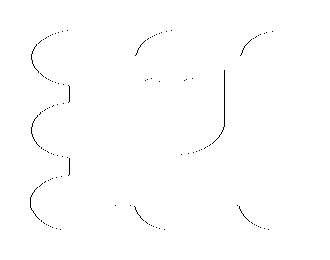

In [31]:
# PIL accesses images in Cartesian co-ordinates, so it is Image[columns, rows]
timg = Image.new( 'RGB', (img.width,img.height), "white") # create a new black image
pixels = timg.load() # create the pixel map

for x,y in pixel_x_ys:
    pixels[x,y] = (0,0,0)
timg

Convert the bitmap to the format required by Psychedelia

In [32]:
origin = (int(img.width/2), int(img.height/2))
x_origin, y_origin = origin
x_array, y_array = [],[]
for x,y in pixel_x_ys:
    x_array += [x - x_origin]
    y_array += [y - y_origin]

x_string,y_string = "",""
for i in range(0, len(x_array), 8):
    x_string += ','.join([str(x) for x in  x_array[i:i+8]])+',0x55,\n'
    y_string += ','.join([str(y) for y in  y_array[i:i+8]])+',0x55,\n'


Write it to a file of its own

In [33]:

output_file = open(f'../src/patterns/{pname}.js','w')
output_file.write(f'export const xArray = [\n{x_string}];\n\n')
output_file.write(f'export const yArray = [\n{y_string}];\n')
output_file.close()